Event Driven Simulation 

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Scheduling CoMP
---------

In [1]:
import eds
import simpy
import numpy as np
import pandas as pd
SCHEDULE_T=2
import matplotlib.pyplot as plt


In [2]:
#df2=pd.read_csv('C2-pi-2-noOH-Copy1')

In [2]:
env=simpy.Environment()
#env = simpy.rt.RealtimeEnvironment(factor=1/10)

ue_list=np.array([])
ue_list2=np.array([])
#define UEs

    
max_prb=50
thr=6
cluster=[19,20]

ue_nr=50

x=np.append(np.ones(ue_nr)*19,np.ones(ue_nr)*20)
y=np.append(np.ones(ue_nr)*20,np.ones(ue_nr)*19)
sinr=np.random.randint(0,12,ue_nr*2)
sinr2=np.random.randint(2,16,ue_nr*2)
rt_nrt=np.array([])
rt_nrt=np.append(rt_nrt,np.ones(ue_nr*2)*0)

df=pd.DataFrame()
df['PCI Serving']=x
df['PCI Coord']=y
df['JT_1 SINR [lin]']=sinr
df['JT_2 SINR [lin]']=sinr2
df['usage']=rt_nrt
df['id']=np.arange(0,ue_nr*2)
   
df['PCI Serving']=df['PCI Serving'].astype('int')
df['PCI Coord']=df['PCI Coord'].astype('int')

df['JT_1 SINR [lin]']=df['JT_1 SINR [lin]'].astype('int')
df['JT_2 SINR [lin]']=df['JT_2 SINR [lin]'].astype('int')

In [3]:
ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env))

        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3019)

comp scheduler: 0
no- comp scheduler: 0
no- comp scheduler: 0
comp scheduler: 2
Rate 0.0
Rate 0.0
Rate 0.0
no- comp scheduler: 2
Rate 0.0
no- comp scheduler: 2
comp scheduler: 4
no- comp scheduler: 4
Rate 0.0
Rate 0.0
no- comp scheduler: 4
comp scheduler: 6
no- comp scheduler: 6
no- comp scheduler: 6
comp scheduler: 8
Rate 0.0
no- comp scheduler: 8
no- comp scheduler: 8
comp scheduler: 10
no- comp scheduler: 10
no- comp scheduler: 10
comp scheduler: 12
no- comp scheduler: 12
no- comp scheduler: 12
comp scheduler: 14
no- comp scheduler: 14
no- comp scheduler: 14
comp scheduler: 16
no- comp scheduler: 16
Rate 0.0
no- comp scheduler: 16
comp scheduler: 18
no- comp scheduler: 18
no- comp scheduler: 18
comp scheduler: 20
Rate 45.40371084024337
no- comp scheduler: 20
no- comp scheduler: 20
comp scheduler: 22
Rate 0.0
Rate 43.24162937166035
Rate 43.24162937166035
no- comp scheduler: 22
Rate 0.0
Rate 43.24162937166035
no- comp scheduler: 22
comp scheduler: 24
Rate 0.0
no- comp scheduler: 24
Ra

C:\Users\Caroline Zoll\EDS\eds.py:154: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:177: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


18.773383444433673
Rate 18.773383444433673
no- comp scheduler: 164
comp scheduler: 166
Rate 1.0346292904686238
Rate 3.365898929599277
Rate 4.718867901936595
Rate 6.267447780011634
no- comp scheduler: 166
Rate 4.718867901936595
Rate 8.131792788891527
Rate 8.131792788891527
Rate 8.131792788891527
Rate 8.358249322279296
no- comp scheduler: 166
comp scheduler: 168
Rate 15.219889930176038
Rate 6.16371096883588
no- comp scheduler: 168
Rate 0.0
Rate 4.647726856657539
Rate 4.647726856657539
no- comp scheduler: 168
comp scheduler: 170
Rate 2.0926147071921446
Rate 3.2724381247705234
Rate 4.578786730166081
Rate 7.828260927132205
Rate 10.13011805755415
no- comp scheduler: 170
Rate 0.0
Rate 0.0
Rate 1.0084856641053033
Rate 7.828260927132205
Rate 10.13011805755415
no- comp scheduler: 170
comp scheduler: 172
Rate 0.9959041665414164
Rate 0.9959041665414164
Rate 0.9959041665414164
Rate 3.2276635094616912
no- comp scheduler: 172
Rate 0.0
Rate 0.0
Rate 3.2276635094616912
Rate 9.898355903333094
no- comp s

Rate 7.2642218727679975
Rate 6.179050520881216
Rate 18.277315390484198
Rate 18.277315390484198
Rate 25.25955609817671
no- comp scheduler: 264
comp scheduler: 266
Rate 4.275385529044283
Rate 7.184193770196425
Rate 6.11598736127715
Rate 8.406840397210699
no- comp scheduler: 266
Rate 2.69291453344166
Rate 7.184193770196425
Rate 9.878792324889975
Rate 9.878792324889975
Rate 9.878792324889975
Rate 10.272586163056596
no- comp scheduler: 266
comp scheduler: 268
Rate 2.6702036481855225
Rate 15.471979752452107
Rate 8.305743910736341
no- comp scheduler: 268
Rate 3.428343999426308
Rate 2.6702036481855225
Rate 7.106132051635405
Rate 7.106132051635405
no- comp scheduler: 268
comp scheduler: 270
Rate 2.6478769095722834
Rate 7.029955467123263
Rate 5.993942661556696
Rate 5.058271919558701
Rate 11.432494207060454
Rate 9.60698342544199
no- comp scheduler: 270
Rate 2.6478769095722834
Rate 3.398702930994938
Rate 2.6478769095722834
Rate 3.398702930994938
Rate 4.198492556771766
Rate 9.60698342544199
Rate 11

Rate 8.963222302717751
Rate 23.56360375802104
no- comp scheduler: 380
Rate 5.756305688861433
Rate 8.963222302717751
Rate 8.963222302717751
no- comp scheduler: 380
comp scheduler: 382
Rate 6.407936735292709
Rate 7.971296161501137
Rate 8.884295360672693
Rate 5.070251916100156
Rate 11.224586505305666
Rate 13.033555409007587
Rate 23.300293036841897
Rate 23.300293036841897
no- comp scheduler: 382
Rate 7.1541743432475515
Rate 7.1541743432475515
Rate 5.716849314633655
Rate 9.937438549294264
Rate 5.716849314633655
Rate 5.070251916100156
Rate 13.033555409007587
Rate 9.937438549294264
Rate 23.299792313065634
no- comp scheduler: 382
comp scheduler: 384
Rate 6.362394147393422
Rate 5.677965238270886
Rate 7.100582623079088
Rate 5.677965238270886
Rate 6.362394147393422
Rate 12.815998313241407
no- comp scheduler: 384
Rate 6.362394147393422
Rate 8.80709120575615
Rate 7.907580882226677
Rate 17.935964075425066
Rate 17.935964075425066
Rate 23.647337108120023
no- comp scheduler: 384
comp scheduler: 386
Rat

Rate 11.11493546976204
no- comp scheduler: 494
Rate 6.089850266811808
Rate 6.638229286455774
Rate 8.526204649255295
Rate 8.526204649255295
Rate 12.378242548045499
no- comp scheduler: 494
comp scheduler: 496
Rate 6.05719264389411
Rate 7.799368176547448
Rate 7.179591255538996
Rate 7.799368176547448
Rate 10.043245960508807
no- comp scheduler: 496
Rate 6.60131859044947
Rate 7.799368176547448
Rate 8.471095832325735
Rate 14.127600809671577
Rate 9.210495241414622
Rate 9.210495241414622
no- comp scheduler: 496
comp scheduler: 498
Rate 7.138265114309079
Rate 8.416843972244324
Rate 9.14706907612319
Rate 6.0249096716499615
Rate 7.138265114309079
Rate 7.752246985399232
Rate 7.752246985399232
Rate 9.14706907612319
no- comp scheduler: 498
Rate 7.752246985399232
no- comp scheduler: 498
comp scheduler: 500
Rate 6.528830745332832
Rate 9.892753139941648
Rate 9.892753139941648
Rate 22.619061029844673
no- comp scheduler: 500
Rate 7.09746944614771
Rate 9.892753139941648
Rate 9.892753139941648
no- comp sche

Rate 10.968897893381214
no- comp scheduler: 608
Rate 7.73238438597453
Rate 10.1728672097741
Rate 10.1728672097741
Rate 7.229302512041869
no- comp scheduler: 608
comp scheduler: 610
Rate 7.195318758578225
Rate 13.036701680473191
Rate 10.109207660238125
Rate 11.822817552984754
Rate 9.420304853848215
Rate 8.798125092598198
no- comp scheduler: 610
Rate 7.694584936070861
Rate 7.195318758578225
Rate 7.694584936070861
Rate 7.195318758578225
Rate 11.822817552984754
Rate 13.036701680473191
Rate 8.226409750164628
no- comp scheduler: 610
comp scheduler: 612
Rate 8.184623974383902
Rate 8.184623974383902
Rate 8.184623974383902
Rate 9.366527541262395
no- comp scheduler: 612
Rate 7.657209273314809
Rate 9.366527541262395
Rate 12.89921808824109
Rate 7.657209273314809
no- comp scheduler: 612
comp scheduler: 614
Rate 12.768375880841543
Rate 11.635335824347951
no- comp scheduler: 614
Rate 7.12841670696906
Rate 7.620249141123979
Rate 9.313544261920313
Rate 9.313544261920313
Rate 12.768375880841543
no- comp

Rate 13.889231712291991
Rate 8.098645853526683
Rate 11.637863229236086
Rate 21.3542014897834
no- comp scheduler: 722
comp scheduler: 724
Rate 9.029272657525798
Rate 8.530971502034724
Rate 9.56671367660251
Rate 8.530971502034724
Rate 13.727844518037829
Rate 9.029272657525798
no- comp scheduler: 724
Rate 9.029272657525798
Rate 10.80914395280696
Rate 10.154251928790114
Rate 17.45545570068312
Rate 17.45545570068312
Rate 21.54073283787238
no- comp scheduler: 724
comp scheduler: 726
Rate 10.747341402438426
Rate 8.9876805196469
Rate 10.101138257820686
Rate 11.486971953740014
no- comp scheduler: 726
Rate 8.030377019980262
Rate 10.747341402438426
Rate 12.377417804326878
Rate 12.377417804326878
Rate 12.377417804326878
Rate 13.103718473523525
no- comp scheduler: 726
comp scheduler: 728
Rate 15.759503614548798
Rate 7.996747361096713
Rate 11.414032982903297
no- comp scheduler: 728
Rate 8.456469410963473
Rate 10.686610913879038
Rate 10.686610913879038
Rate 7.996747361096713
no- comp scheduler: 728
c

Rate 10.186962244123567
Rate 9.201518754876455
Rate 10.74977115484205
Rate 9.201518754876455
Rate 8.343418477856364
Rate 9.674735118205527
Rate 9.674735118205527
Rate 10.74977115484205
no- comp scheduler: 838
Rate 9.674735118205527
no- comp scheduler: 838
comp scheduler: 840
Rate 8.72567937706162
Rate 11.320476659559707
Rate 11.320476659559707
Rate 21.1370494740448
no- comp scheduler: 840
Rate 9.164304881015687
Rate 11.320476659559707
Rate 11.320476659559707
no- comp scheduler: 840
comp scheduler: 842
Rate 10.645433479851508
Rate 11.260172464903178
Rate 9.592795111920456
Rate 12.835933105528595
Rate 8.692107566065433
Rate 14.053944806810252
Rate 20.96672619243844
Rate 20.96672619243844
no- comp scheduler: 842
Rate 10.095250481145088
Rate 10.095250481145088
Rate 11.96927294984857
Rate 9.127473367998435
Rate 9.127473367998435
Rate 14.053944806810252
Rate 8.692107566065433
Rate 11.96927294984857
Rate 20.966151885739137
no- comp scheduler: 842
comp scheduler: 844
Rate 9.552513459177591
Rat

no- comp scheduler: 950
comp scheduler: 952
Rate 9.757737292032479
Rate 9.757737292032479
Rate 9.757737292032479
Rate 10.705230096062637
no- comp scheduler: 952
Rate 9.334926457031383
Rate 10.705230096062637
Rate 13.537270683746046
Rate 9.334926457031383
no- comp scheduler: 952
comp scheduler: 954
Rate 13.430752088034493
Rate 12.521902026621474
no- comp scheduler: 954
Rate 8.906748534793902
Rate 9.301264099733373
Rate 10.65951385066335
Rate 10.65951385066335
Rate 13.430752088034493
no- comp scheduler: 954
comp scheduler: 956
Rate 8.876076403224323
Rate 10.130656734807758
Rate 9.684341239903326
Rate 11.746524298937473
Rate 10.130656734807758
no- comp scheduler: 956
Rate 9.267913906195608
Rate 10.130656734807758
Rate 14.687761370016583
Rate 10.614383138562603
Rate 11.146841515138751
Rate 11.146841515138751
no- comp scheduler: 956
comp scheduler: 958
Rate 10.56982194433033
Rate 9.648195876460091
Rate 11.096183292299775
Rate 9.648195876460091
Rate 8.84566626133969
Rate 10.090766699592768
R

Rate 10.268216990482328
Rate 9.857216402953037
Rate 10.711500278447357
Rate 9.857216402953037
Rate 14.143615981511898
Rate 10.268216990482328
no- comp scheduler: 1064
Rate 11.736261244496022
Rate 10.268216990482328
Rate 11.19610394469224
Rate 17.21816310881706
Rate 17.21816310881706
Rate 20.559575787483606
no- comp scheduler: 1064
comp scheduler: 1066
Rate 11.683297945348775
Rate 11.150072241567507
Rate 10.231283326636394
Rate 12.29361689000388
no- comp scheduler: 1066
Rate 9.441347783001792
Rate 11.683297945348775
Rate 13.028383687895511
Rate 13.028383687895511
Rate 13.028383687895511
Rate 13.867948217030156
no- comp scheduler: 1066
comp scheduler: 1068
Rate 15.819005770047323
Rate 9.410621670185597
Rate 12.231691677856237
no- comp scheduler: 1068
Rate 9.790135772977617
Rate 11.631183318605544
Rate 11.631183318605544
Rate 9.410621670185597
no- comp scheduler: 1068
comp scheduler: 1070
Rate 9.380155311399044
Rate 13.789887212902476
Rate 11.579885926374368
Rate 12.873511136673931
Rate 1

comp scheduler: 1180
Rate 9.876943628018566
Rate 12.066039747194223
Rate 12.066039747194223
Rate 20.34777396849191
no- comp scheduler: 1180
Rate 10.246989255456924
Rate 12.066039747194223
Rate 12.066039747194223
no- comp scheduler: 1180
comp scheduler: 1182
Rate 11.494938382451926
Rate 12.013739582290164
Rate 10.606577530841854
Rate 13.343582866827663
Rate 9.846453655780186
Rate 14.371508453796617
Rate 20.205462968299997
Rate 20.205462968299997
no- comp scheduler: 1182
Rate 11.030618391691121
Rate 11.030618391691121
Rate 12.612175977803021
Rate 10.213875123921495
Rate 10.213875123921495
Rate 14.371508453796617
Rate 12.612175977803021
Rate 9.846453655780186
Rate 20.204914724555007
no- comp scheduler: 1182
comp scheduler: 1184
Rate 10.570671199143053
Rate 10.181063919118742
Rate 10.990880807947997
Rate 10.181063919118742
Rate 14.244348818390659
Rate 10.570671199143053
no- comp scheduler: 1184
Rate 11.962301153250662
Rate 10.570671199143053
Rate 11.450259996261252
Rate 17.15886032986274
R

Rate 10.352270953070443
Rate 12.028662008247194
Rate 12.028662008247194
Rate 10.006699189459642
no- comp scheduler: 1288
comp scheduler: 1290
Rate 9.977971778275421
Rate 13.99395523466247
Rate 13.159403102205609
Rate 11.981286708880877
Rate 11.507662173302075
Rate 11.079910104744263
no- comp scheduler: 1290
Rate 10.321220069981944
Rate 9.977971778275421
Rate 13.159403102205609
Rate 10.321220069981944
Rate 9.977971778275421
Rate 13.99395523466247
Rate 10.686852606601157
no- comp scheduler: 1290
comp scheduler: 1292
Rate 10.653350002831306
Rate 10.653350002831306
Rate 10.653350002831306
Rate 11.466616955648721
no- comp scheduler: 1292
Rate 10.290436344873251
Rate 11.466616955648721
Rate 13.89745865619129
Rate 10.290436344873251
no- comp scheduler: 1292
comp scheduler: 1294
Rate 13.805381208222835
Rate 13.02506723011125
no- comp scheduler: 1294
Rate 9.921194630591216
Rate 10.259914979497006
Rate 11.426071325208673
Rate 11.426071325208673
Rate 13.805381208222835
no- comp scheduler: 1294
co

comp scheduler: 1402
Rate 11.86923671955334
Rate 12.345581366823808
Rate 11.053575659707992
Rate 13.566595756334735
Rate 14.510400148648563
Rate 10.355657190627726
Rate 19.866927863444847
Rate 19.866927863444847
no- comp scheduler: 1402
Rate 11.442914763689426
Rate 11.442914763689426
Rate 12.895044193477384
Rate 10.693010399710381
Rate 10.693010399710381
Rate 14.510400148648563
Rate 12.895044193477384
Rate 10.355657190627726
Rate 19.866398748084606
no- comp scheduler: 1402
comp scheduler: 1404
Rate 11.01992927684101
Rate 10.662158394893629
Rate 11.405801846613139
Rate 10.662158394893629
Rate 14.3934157315771
Rate 11.01992927684101
no- comp scheduler: 1404
Rate 12.297843478019207
Rate 11.01992927684101
Rate 11.827643289978504
Rate 17.069770633980635
Rate 17.069770633980635
Rate 19.963508477441923
no- comp scheduler: 1404
comp scheduler: 1406
Rate 12.250855108808375
Rate 11.786583220037324
Rate 10.986607033795623
Rate 12.782250964594091
no- comp scheduler: 1406
Rate 10.298821609631098
Ra

Rate 13.975915495534734
Rate 13.25453998454882
no- comp scheduler: 1514
Rate 10.385108261779152
Rate 10.698244475697281
Rate 11.77631901155666
Rate 11.77631901155666
Rate 13.975915495534734
no- comp scheduler: 1514
comp scheduler: 1516
Rate 10.358523553363373
Rate 11.354699079714438
Rate 11.000310793956821
Rate 12.63774782572728
Rate 11.354699079714438
no- comp scheduler: 1516
Rate 10.669654631174732
Rate 11.354699079714438
Rate 14.97318088939366
Rate 11.73879278239681
Rate 12.16158117640609
Rate 12.16158117640609
no- comp scheduler: 1516
comp scheduler: 1518
Rate 11.70169646753517
Rate 12.11980501857627
Rate 10.969614331706868
Rate 10.969614331706868
Rate 10.332134973011527
Rate 11.321164927712653
Rate 11.321164927712653
Rate 12.11980501857627
no- comp scheduler: 1518
Rate 11.321164927712653
no- comp scheduler: 1518
comp scheduler: 1520
Rate 10.613159608686122
Rate 12.541854185051491
Rate 12.541854185051491
Rate 19.838443738885815
no- comp scheduler: 1520
Rate 10.939186861850706
Rate 

Rate 10.983474376279993
Rate 12.474511515873829
Rate 12.474511515873829
Rate 10.676111525382217
no- comp scheduler: 1628
comp scheduler: 1630
Rate 10.649674265980993
Rate 14.222200379994973
Rate 13.479802081026257
Rate 12.431776951887166
Rate 12.010451505712338
Rate 11.629933146550284
no- comp scheduler: 1630
Rate 10.955020017284312
Rate 10.649674265980993
Rate 13.479802081026257
Rate 10.955020017284312
Rate 14.222200379994973
Rate 10.649674265980993
Rate 11.280278275788314
no- comp scheduler: 1630
comp scheduler: 1632
Rate 11.249688404836828
Rate 11.249688404836828
Rate 11.249688404836828
Rate 11.973268809739428
no- comp scheduler: 1632
Rate 10.926796627837593
Rate 11.973268809739428
Rate 14.136038876615117
Rate 10.926796627837593
no- comp scheduler: 1632
comp scheduler: 1634
Rate 14.053782953451393
Rate 13.359409610534584
no- comp scheduler: 1634
Rate 10.597385023800316
Rate 10.898800079253856
Rate 11.936520667183226
Rate 11.936520667183226
Rate 14.053782953451393
no- comp scheduler:

no- comp scheduler: 1736
comp scheduler: 1738
Rate 11.986586193886819
Rate 12.377329004223439
Rate 11.302419772419253
Rate 11.302419772419253
Rate 10.706664255035166
Rate 11.630960931208682
Rate 11.630960931208682
Rate 12.377329004223439
no- comp scheduler: 1738
Rate 11.630960931208682
no- comp scheduler: 1738
comp scheduler: 1740
Rate 10.968867277127167
Rate 12.771476536960247
Rate 12.771476536960247
Rate 19.591063244011448
no- comp scheduler: 1740
Rate 11.273581021187121
Rate 12.771476536960247
Rate 12.771476536960247
no- comp scheduler: 1740
comp scheduler: 1742
Rate 12.300163035847545
Rate 12.727485875678443
Rate 11.568443675863456
Rate 13.82284265021135
Rate 14.669517794939962
Rate 10.942349725009274
Rate 19.474791975799956
Rate 19.474791975799956
no- comp scheduler: 1742
Rate 11.917714928356602
Rate 11.917714928356602
Rate 13.220402121956317
Rate 11.244985079804003
Rate 11.244985079804003
Rate 14.669517794939962
Rate 13.220402121956317
Rate 10.942349725009274
Rate 19.474290708316

no- comp scheduler: 1852
Rate 11.240844609760225
Rate 12.22317905167494
Rate 14.253394057269302
Rate 11.240844609760225
no- comp scheduler: 1852
comp scheduler: 1854
Rate 14.176039585091546
Rate 13.524176607085577
no- comp scheduler: 1854
Rate 10.931246462516352
Rate 11.214208528482807
Rate 12.188398623315976
Rate 12.188398623315976
Rate 14.176039585091546
no- comp scheduler: 1854
comp scheduler: 1856
Rate 10.906594452315295
Rate 11.806886394015535
Rate 11.486608582062841
Rate 12.966439521239105
Rate 11.806886394015535
no- comp scheduler: 1856
Rate 11.187778635982301
Rate 11.806886394015535
Rate 15.077083189931448
Rate 12.154010426111949
Rate 12.53610471984066
Rate 12.53610471984066
no- comp scheduler: 1856
comp scheduler: 1858
Rate 12.120003710783722
Rate 12.497914240032564
Rate 11.458305817460102
Rate 11.458305817460102
Rate 10.882115349147762
Rate 11.77605744311683
Rate 11.77605744311683
Rate 12.497914240032564
no- comp scheduler: 1858
Rate 11.77605744311683
no- comp scheduler: 1858

Rate 11.187132084788086
Rate 12.837824569397096
Rate 13.828177951763225
Rate 13.828177951763225
Rate 13.828177951763225
Rate 14.82983850041395
no- comp scheduler: 1966
comp scheduler: 1968
Rate 15.88274415814643
Rate 11.16238414928225
Rate 13.240359788523655
no- comp scheduler: 1968
Rate 11.441930937630678
Rate 12.798030552350568
Rate 12.798030552350568
Rate 11.16238414928225
no- comp scheduler: 1968
comp scheduler: 1970
Rate 11.13781352524078
Rate 14.3873738609982
Rate 13.712090325295241
Rate 12.758809430533356
Rate 12.375572915350345
Rate 12.029454418942437
no- comp scheduler: 1970
Rate 11.415555215703181
Rate 11.13781352524078
Rate 13.712090325295241
Rate 11.415555215703181
Rate 14.3873738609982
Rate 11.13781352524078
Rate 11.711409270223893
no- comp scheduler: 1970
comp scheduler: 1972
Rate 11.683117783676714
Rate 11.683117783676714
Rate 11.683117783676714
Rate 12.34135426567975
no- comp scheduler: 1972
Rate 11.389385192357729
Rate 12.34135426567975
Rate 14.30881240931665
Rate 11.3

Rate 11.950459013312562
Rate 14.012533327852664
Rate 14.78697790867909
Rate 19.18231013488378
Rate 11.377777660439442
Rate 19.18231013488378
no- comp scheduler: 2082
Rate 12.269933643477211
Rate 13.461487504336867
Rate 12.269933643477211
Rate 11.65459494029757
Rate 11.65459494029757
Rate 14.78697790867909
Rate 13.461487504336867
Rate 11.377777660439442
Rate 19.181833565595387
no- comp scheduler: 2082
comp scheduler: 2084
Rate 11.92187777724707
Rate 11.628238291259125
Rate 12.238581647690621
Rate 11.628238291259125
Rate 14.690657682319683
Rate 11.92187777724707
no- comp scheduler: 2084
Rate 12.970722409678217
Rate 11.92187777724707
Rate 12.584806874081297
Rate 16.88726874687995
Rate 19.24755278325935
Rate 16.88726874687995
no- comp scheduler: 2084
comp scheduler: 2086
Rate 12.931421143903592
Rate 12.550282728788414
Rate 11.893551914090297
Rate 13.367664171257786
no- comp scheduler: 2086
Rate 11.32892275422603
Rate 12.931421143903592
Rate 13.89285988264563
Rate 13.89285988264563
Rate 13.

Rate 11.321090596684217
Rate 12.148741367327698
Rate 11.854305567555855
Rate 13.214734513435605
Rate 12.148741367327698
no- comp scheduler: 2196
Rate 11.579587086017723
Rate 12.148741367327698
Rate 15.155078281978001
Rate 12.467857266700182
Rate 12.819121808806162
Rate 12.819121808806162
no- comp scheduler: 2196
comp scheduler: 2198
Rate 12.436290143814551
Rate 12.783737462004856
Rate 11.82793144329239
Rate 11.82793144329239
Rate 11.29818744970782
Rate 12.120069242163684
Rate 12.120069242163684
Rate 12.783737462004856
no- comp scheduler: 2198
Rate 12.120069242163684
no- comp scheduler: 2198
comp scheduler: 2200
Rate 11.530789128663306
Rate 13.133856720694
Rate 13.133856720694
Rate 19.198542332111217
no- comp scheduler: 2200
Rate 11.801772274502722
Rate 13.133856720694
Rate 13.133856720694
no- comp scheduler: 2200
comp scheduler: 2202
Rate 12.714310574485497
Rate 13.094376122549608
Rate 12.063511474461926
Rate 14.0685982657033
Rate 14.82164028199449
Rate 19.095503026774466
Rate 11.50665

Rate 12.016386919433028
Rate 12.016386919433028
Rate 12.016386919433028
Rate 12.624288668043068
no- comp scheduler: 2312
Rate 11.745115786992606
Rate 12.624288668043068
Rate 14.441297111869169
Rate 11.745115786992606
no- comp scheduler: 2312
comp scheduler: 2314
Rate 14.371882395805319
Rate 13.788413294043748
no- comp scheduler: 2314
Rate 11.46753502141925
Rate 11.720808528325705
Rate 12.592785981802347
Rate 12.592785981802347
Rate 14.371882395805319
no- comp scheduler: 2314
comp scheduler: 2316
Rate 11.444972462059264
Rate 12.250891569245807
Rate 11.964186783492519
Rate 13.288894885439575
Rate 12.250891569245807
no- comp scheduler: 2316
Rate 11.69668159746252
Rate 12.250891569245807
Rate 15.178290960504993
Rate 12.561628428116057
Rate 12.903669801363675
Rate 12.903669801363675
no- comp scheduler: 2316
comp scheduler: 2318
Rate 12.53080651255808
Rate 12.869138870051358
Rate 11.938407542776803
Rate 11.938407542776803
Rate 11.42256089543211
Rate 12.222881375298604
Rate 12.222881375298604

Rate 12.86889821853612
Rate 13.231287724488121
Rate 12.248366403608841
Rate 14.16020086313813
Rate 14.878220493264738
Rate 18.9533149512508
Rate 11.71740981439549
Rate 18.9533149512508
no- comp scheduler: 2422
Rate 12.54456455834429
Rate 13.649303468825654
Rate 12.54456455834429
Rate 11.974058573799663
Rate 11.974058573799663
Rate 14.878220493264738
Rate 13.649303468825654
Rate 11.71740981439549
Rate 18.9528600358473
no- comp scheduler: 2422
comp scheduler: 2424
Rate 12.221607709783946
Rate 11.949344038001504
Rate 12.515256768406164
Rate 11.949344038001504
Rate 14.788831190564279
Rate 12.221607709783946
no- comp scheduler: 2424
Rate 13.194100526253235
Rate 12.221607709783946
Rate 12.836278142911308
Rate 16.825537500354233
Rate 19.009447562115376
Rate 16.825537500354233
no- comp scheduler: 2424
comp scheduler: 2426
Rate 13.157463819081917
Rate 12.804047025025303
Rate 12.195082696360998
Rate 13.561977261030497
no- comp scheduler: 2426
Rate 11.671521125035758
Rate 13.157463819081917
Rate 

no- comp scheduler: 2538
comp scheduler: 2540
Rate 11.843303263726519
Rate 13.33520325147996
Rate 13.33520325147996
Rate 18.97932233565429
no- comp scheduler: 2540
Rate 12.095494596125098
Rate 13.33520325147996
Rate 13.33520325147996
no- comp scheduler: 2540
comp scheduler: 2542
Rate 12.944560996010058
Rate 13.298291728185122
Rate 12.338855892448855
Rate 14.205009829192239
Rate 14.905873417428705
Rate 18.883599379771795
Rate 11.820585743973606
Rate 18.883599379771795
no- comp scheduler: 2542
Rate 12.62797682013198
Rate 13.706319590131004
Rate 12.62797682013198
Rate 12.071102251998223
Rate 12.071102251998223
Rate 14.905873417428705
Rate 13.706319590131004
Rate 11.820585743973606
Rate 18.883151457940805
no- comp scheduler: 2542
comp scheduler: 2544
Rate 12.312663340673552
Rate 12.046899838218314
Rate 12.5993016637418
Rate 12.046899838218314
Rate 14.818595547386339
Rate 12.312663340673552
no- comp scheduler: 2544
Rate 13.261938340622708
Rate 12.312663340673552
Rate 12.91265880130238
Rate 

Rate 11.813261986110815
Rate 14.032742193757738
Rate 14.614955591326652
Rate 12.052724263363494
Rate 11.813261986110815
Rate 12.307802589962574
no- comp scheduler: 2650
comp scheduler: 2652
Rate 12.282916672916844
Rate 12.282916672916844
Rate 12.282916672916844
Rate 12.850506400683905
no- comp scheduler: 2652
Rate 12.029634446693668
Rate 12.850506400683905
Rate 14.547022869570155
Rate 12.029634446693668
no- comp scheduler: 2652
comp scheduler: 2654
Rate 14.482123255190993
Rate 13.937315765201687
no- comp scheduler: 2654
Rate 11.770222662136296
Rate 12.006713854492338
Rate 12.820912663515124
Rate 12.820912663515124
Rate 14.482123255190993
no- comp scheduler: 2654
comp scheduler: 2656
Rate 11.74891600573443
Rate 12.501475247408099
Rate 12.233753171796906
Rate 13.470752413718943
Rate 12.501475247408099
no- comp scheduler: 2656
Rate 11.983959491330264
Rate 12.501475247408099
Rate 15.235051665087006
Rate 12.791638233725438
Rate 13.111033064021575
Rate 13.111033064021575
no- comp scheduler: 

Rate 13.070148956609165
Rate 13.409496982353929
Rate 12.489071848004171
Rate 14.279347887283247
Rate 14.951714332579042
Rate 18.767705790190703
Rate 11.99187458553824
Rate 18.767705790190703
no- comp scheduler: 2762
Rate 12.766437106621856
Rate 13.800934414292007
Rate 12.766437106621856
Rate 12.232205081822482
Rate 12.232205081822482
Rate 14.951714332579042
Rate 13.800934414292007
Rate 11.99187458553824
Rate 18.767269906811798
no- comp scheduler: 2762
comp scheduler: 2764
Rate 12.463831459422865
Rate 12.208865926053505
Rate 12.738823669602313
Rate 12.208865926053505
Rate 14.867947659613312
Rate 12.463831459422865
no- comp scheduler: 2764
Rate 13.374537423335298
Rate 12.463831459422865
Rate 13.039449109044233
Rate 16.775252836219053
Rate 18.81695837274044
Rate 16.775252836219053
no- comp scheduler: 2764
comp scheduler: 2766
Rate 13.340090077931299
Rate 13.009110656773371
Rate 12.438807647984108
Rate 13.718922173967165
no- comp scheduler: 2766
Rate 11.948485431462577
Rate 13.340090077931

no- comp scheduler: 2876
Rate 12.14189174495771
Rate 12.63921646194946
Rate 15.266141540715601
Rate 12.918058648601734
Rate 13.224992189697188
Rate 13.224992189697188
no- comp scheduler: 2876
comp scheduler: 2878
Rate 12.89013340240828
Rate 13.193764145145584
Rate 12.358494807376584
Rate 12.358494807376584
Rate 11.895556819912827
Rate 12.613791113345876
Rate 12.613791113345876
Rate 13.193764145145584
no- comp scheduler: 2878
Rate 12.613791113345876
no- comp scheduler: 2878
comp scheduler: 2880
Rate 12.09839856862113
Rate 13.499453872287738
Rate 13.499453872287738
Rate 18.79989159755115
no- comp scheduler: 2880
Rate 12.335233481615417
Rate 13.499453872287738
Rate 13.499453872287738
no- comp scheduler: 2880
comp scheduler: 2882
Rate 13.132462366819876
Rate 13.464669183002314
Rate 12.563613393019283
Rate 14.3162150231344
Rate 14.974432248973299
Rate 18.710120322980472
Rate 12.076879105363018
Rate 18.710120322980472
no- comp scheduler: 2882
Rate 12.835141801893254
Rate 13.84786924056384
Ra

Rate 14.557925973239957
Rate 14.039771120317571
no- comp scheduler: 2934
Rate 11.978694815896691
Rate 12.203616574947931
Rate 12.97798379986818
Rate 12.97798379986818
Rate 14.557925973239957
no- comp scheduler: 2934
comp scheduler: 2936
Rate 11.958282982053968
Rate 12.674051849338055
Rate 12.419417906658678
Rate 13.595943948984164
Rate 12.674051849338055
no- comp scheduler: 2936
Rate 12.181835893414519
Rate 12.674051849338055
Rate 15.273991877667292
Rate 12.950029633601549
Rate 13.253810204270026
Rate 13.253810204270026
no- comp scheduler: 2936
comp scheduler: 2938
Rate 12.92236895762647
Rate 13.222882792502102
Rate 12.396187874905568
Rate 12.396187874905568
Rate 11.938002156726494
Rate 12.64886344802035
Rate 12.64886344802035
Rate 13.222882792502102
no- comp scheduler: 2938
Rate 12.64886344802035
no- comp scheduler: 2938
comp scheduler: 2940
Rate 12.138733823290696
Rate 13.525416492530377
Rate 13.525416492530377
Rate 18.771480023193103
no- comp scheduler: 2940
Rate 12.37313918078129
R

comp scheduler: 3018
Rate 12.963835346345013
Rate 13.260338808630303
Rate 12.44467617724941
Rate 12.44467617724941
Rate 11.992604971056888
Rate 12.693979781838712
Rate 12.693979781838712
Rate 13.260338808630303
no- comp scheduler: 3018
Rate 12.693979781838712
no- comp scheduler: 3018


In [4]:
ue_list=ue_dict[19]

In [5]:
ue_all[60].mon

{2: 0,
 4: 0,
 6: 0,
 8: 0,
 10: 0,
 12: 0,
 14: 0,
 16: 0,
 18: 0,
 20: 0,
 22: 0,
 24: 0,
 26: 0,
 28: 0,
 30: 0,
 32: 0,
 34: 0,
 36: 0,
 38: 0,
 40: 0,
 42: 0,
 44: 0,
 46: 0,
 48: 0,
 50: 0,
 52: 0,
 54: 0,
 56: 0,
 58: 0,
 60: 0,
 62: 0,
 64: 0,
 66: 0,
 68: 0,
 70: 0,
 72: 0,
 74: 0,
 76: 0,
 78: 0,
 80: 0,
 82: 0,
 84: 0,
 86: 0,
 88: 0,
 90: 0,
 92: 0,
 94: 0,
 95: 160,
 96: 160,
 98: 0,
 100: 0,
 102: 0,
 104: 0,
 106: 0,
 108: 0,
 110: 0,
 112: 0,
 114: 0,
 115: 160,
 116: 160,
 118: 0,
 120: 0,
 122: 0,
 124: 0,
 126: 0,
 128: 0,
 130: 0,
 132: 0,
 134: 0,
 135: 160,
 136: 160,
 138: 0,
 140: 0,
 142: 0,
 144: 0,
 146: 0,
 148: 0,
 150: 0,
 152: 0,
 154: 0,
 155: 160,
 156: 160,
 158: 0,
 160: 0,
 162: 0,
 164: 0,
 166: 0,
 168: 0,
 170: 0,
 172: 0,
 174: 0,
 175: 160,
 176: 160,
 178: 0,
 180: 0,
 182: 0,
 184: 0,
 186: 0,
 188: 0,
 190: 0,
 192: 0,
 194: 0,
 195: 160,
 196: 160,
 198: 0,
 200: 0,
 202: 0,
 204: 0,
 206: 0,
 208: 0,
 210: 0,
 212: 0,
 214: 0,
 215: 160,
 2

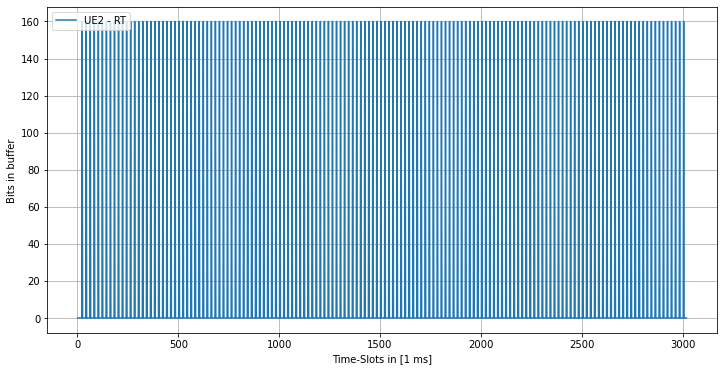

In [6]:

plt.figure(figsize=(12,6))
#plt.plot(list(ue_all[20].mon.keys())[1000:3000],list(ue_all[20].mon.values())[1000:3000],label='UE1 - RT')
plt.plot(list(ue_all[9].mon.keys()),list(ue_all[9].mon.values()),label='UE2 - RT')
#plt.plot(list(ue_all[45].mon.keys())[1000:3000],list(ue_all[45].mon.values())[1000:3000],label='UE3 - RT')
#plt.plot(list(ue_list[120].mon.keys())[1000:3000],list(ue_list[120].mon.values())[1000:3000],label='UE4')
plt.xlabel('Time-Slots in [1 ms]')
plt.ylabel('Bits in buffer')
plt.legend(loc="upper left")
plt.grid()
#plt.axvline(x = 13, color = 'b', label = 'axvline - full height')
#plt.axvline(x = 27, color = 'b', label = 'axvline - full height')

In [7]:
df=eds.ue_to_df(ue_all[0:49])

In [8]:
df

,mr,mr2,queue,queue2,tbs,tbs2,comp,sinr1,sinr2,sinr-gain,qos,mr-Mon,mr2-Mon
0,13.533764,13.533764,0,0,100.00,77.50,0,10.0,8.0,-2.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
1,12.497709,12.497709,0,0,66.25,88.75,0,7.0,9.0,2.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
2,13.563305,13.563305,0,0,105.00,42.00,0,11.0,4.0,-7.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
3,12.767697,12.777383,0,0,18.00,105.00,1,1.0,11.0,10.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
4,12.747013,12.756601,0,0,34.00,105.00,1,3.0,11.0,8.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
5,12.554722,12.554722,0,0,50.00,26.00,0,5.0,2.0,-3.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
6,14.110103,14.110103,0,0,66.25,77.50,0,7.0,8.0,1.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
7,13.313372,13.325528,0,0,10.00,105.00,1,0.0,11.0,11.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
8,12.194662,12.194662,0,0,105.00,100.00,0,11.0,10.0,-1.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
9,14.933882,14.933882,0,0,34.00,88.75,0,3.0,9.0,6.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."


In [9]:
av=0
for i in ue_all:
    av+=i.mR2/i.mR
av=av/(ue_nr*2)
print('CoMP-gain',av)

CoMP-gain 1.0007629844022452


In [29]:
print('comp prb perc',prb_number_comp/(prb_number_normal+prb_number_comp))
print('comp user perc',len(ue_comp)/len(ue_all))

comp prb perc 0.35
comp user perc 0.26


In [42]:
160/12

13.333333333333334

In [38]:
df[df['mr']<14]

,mr,mr2,queue,queue2,tbs,tbs2,comp,sinr1,sinr2,sinr-gain,qos,mr-Mon,mr2-Mon
1,12.497709,12.497709,0.0,0.0,18.00,88.75,1,1.0,9.0,8.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
2,13.739845,13.739845,0.0,0.0,10.00,142.50,1,0.0,13.0,13.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
3,12.282215,12.282215,0.0,0.0,100.00,66.25,0,10.0,7.0,-3.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
4,12.767697,12.767697,0.0,0.0,34.00,142.50,1,3.0,13.0,10.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
5,13.838785,13.838785,0.0,0.0,77.50,88.75,0,8.0,9.0,1.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
6,13.134798,13.134798,0.0,0.0,66.25,55.00,0,7.0,6.0,-1.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
8,13.134798,13.134798,0.0,0.0,66.25,55.00,0,7.0,6.0,-1.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
10,12.335048,12.335048,0.0,0.0,18.00,55.00,0,1.0,6.0,5.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
11,12.094230,12.094230,0.0,0.0,34.00,180.00,1,3.0,15.0,12.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."
12,12.497709,12.497709,0.0,0.0,42.00,77.50,0,4.0,8.0,4.0,0.0,"{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ...","{2: 0.1, 4: 0.0, 6: 0.0, 8: 0.0, 10: 0.0, 12: ..."


In [35]:
df.iloc[18]['mr-Mon']

{2: 0.1,
 4: 0.0,
 6: 0.0,
 8: 0.0,
 10: 0.0,
 12: 0.0,
 14: 0.0,
 16: 0.0,
 18: 0.0,
 20: 0.0,
 22: 0.0,
 24: 0.0,
 26: 0.0,
 28: 0.0,
 30: 0.0,
 32: 0.0,
 34: 0.0,
 36: 4.848484848484849,
 38: 4.70995670995671,
 40: 4.5826605826605835,
 42: 4.465156465156466,
 44: 4.356250209908747,
 46: 4.254942065492264,
 48: 4.1603877973702135,
 50: 4.071868908064464,
 52: 3.9887695425937606,
 54: 3.910558375091922,
 56: 6.8556421793354705,
 58: 6.730994139711189,
 60: 6.6129065232250275,
 62: 6.500823361814434,
 64: 6.394252487030591,
 66: 6.292756415807883,
 68: 6.195944778641608,
 70: 6.103467990900688,
 72: 6.0150119330615475,
 74: 5.930293455131103,
 76: 8.040837380403278,
 78: 7.933626215331235,
 80: 7.830592108638622,
 82: 7.731470689541931,
 84: 7.636020434115487,
 86: 7.5440201879213244,
 88: 7.455267009239898,
 90: 7.369574284995761,
 92: 7.28677007954637,
 94: 7.206695683067839,
 96: 8.849634439163884,
 98: 8.756480392435844,
 100: 8.666207398699392,
 102: 8.578669950227681,
 104: 8.493

In [32]:
(1-1/40)*8+(1/40*160)

11.8

In [33]:
np.mod(0,20)

0

In [99]:
x=0
for i in np.linspace(1,80,80):
    if(np.mod((i-1),20)==0):
        print('x')
        x=(1-1/i)*x+160*1/i
    else:
        x=(1-1/i)*x
    print(x)

x
160.0
80.0
53.33333333333334
40.00000000000001
32.00000000000001
26.666666666666675
22.857142857142865
20.000000000000007
17.777777777777782
16.000000000000004
14.545454545454549
13.333333333333336
12.30769230769231
11.42857142857143
10.666666666666668
10.000000000000002
9.411764705882355
8.888888888888891
8.42105263157895
8.000000000000002
x
15.238095238095239
14.545454545454547
13.913043478260871
13.333333333333336
12.800000000000002
12.30769230769231
11.851851851851855
11.428571428571432
11.034482758620694
10.666666666666671
10.322580645161295
10.000000000000005
9.696969696969703
9.411764705882359
9.142857142857148
8.888888888888893
8.648648648648653
8.421052631578952
8.20512820512821
8.000000000000004
x
11.707317073170735
11.42857142857143
11.16279069767442
10.909090909090912
10.66666666666667
10.434782608695656
10.212765957446813
10.000000000000004
9.795918367346943
9.600000000000003
9.411764705882355
9.230769230769232
9.056603773584907
8.888888888888891
8.72727272727273
8.57142